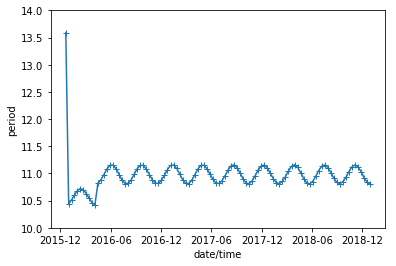

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Both of data_url_prefix will be available.
data_url_prefix = 'https://naif.jpl.nasa.gov/pub/naif/pds/data/'
# data_url_prefix = 'http://darts.isas.jaxa.jp/pub/pds3/'

# vco_v??.orb can be updated if new orbit number file is available.
data_url_filepath = 'vco-v-spice-6-v1.0/vcosp_1000/extras/orbnum/vco_v03.orb'

data_url = data_url_prefix + data_url_filepath


def _dp(_date):
    _fmt = '%Y-%m-%d %H:%M:%S'
    _tbl = {' JAN ': '-01-',
            ' FEB ': '-02-',
            ' MAR ': '-03-',
            ' APR ': '-04-',
            ' MAY ': '-05-',
            ' JUN ': '-06-',
            ' JUL ': '-07-',
            ' AUG ': '-08-',
            ' SEP ': '-09-',
            ' OCT ': '-10-',
            ' NOV ': '-11-',
            ' DEC ': '-12-'
           }
    for key in _tbl.keys():
        _date = _date.replace(key, _tbl[key])
    return pd.datetime.strptime(_date, _fmt)


def main():
    df = pd.read_fwf(data_url,
                     colspecs=((0, 6), (7, 27)),
                     header=1,
                     names=('orbnum', 'utc'),
                     parse_dates=[1],
                     date_parser=_dp)

    sec_of_day = 86400.0
    df['period'] = df.utc.diff(periods=1).astype('timedelta64[s]')/sec_of_day

    ax = plt.axes()
    plt.plot(df.utc, df.period, marker='+')
    plt.xlabel('date/time')
    plt.ylabel('period')
    plt.ylim(10.0, 14.0)

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.show()


if __name__ == '__main__':
    main()